In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test)=keras .datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
X_train=X_train/255;
X_test=X_test/255;

In [5]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [6]:
X_test_flattened.shape

(10000, 784)

In [7]:
X_train_flattened.shape

(60000, 784)

In [9]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')##the nn is defined here.
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
history=model.fit(X_train_flattened,y_train,epochs=5)## here the training is done and the trainig dataset is provided

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4707 - accuracy: 0.8771
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3036 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2829 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2731 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2666 - accuracy: 0.9254


In [10]:
model.evaluate(X_test_flattened,y_test)## evaluating the accuracy of the test dataset

313/313 [==============================] - 0s 976us/step - loss: 0.2656 - accuracy: 0.9265


[0.2655569016933441, 0.9265000224113464]

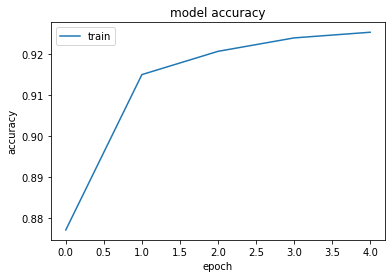

In [11]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

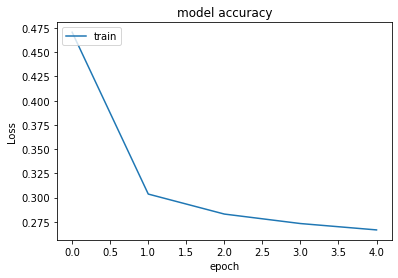

In [12]:
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

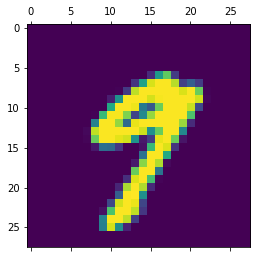

In [13]:
plt.matshow(X_test[20])

In [14]:
y_predict=model.predict(X_test_flattened)
y_predict## predicting the output values for all possible combination(0-9)

array([[2.13834345e-02, 2.31489707e-07, 4.31811213e-02, ...,
        9.99721169e-01, 8.02882612e-02, 6.85070276e-01],
       [4.51908380e-01, 4.73669171e-03, 9.99474943e-01, ...,
        1.09427213e-12, 1.84278041e-01, 2.96559399e-09],
       [4.38958406e-04, 9.92857695e-01, 6.75814390e-01, ...,
        1.54213756e-01, 3.34672391e-01, 5.71851432e-02],
       ...,
       [3.63773279e-06, 2.50937637e-06, 8.71688128e-04, ...,
        1.93672836e-01, 4.01793420e-01, 8.25229287e-01],
       [1.15519797e-04, 1.05606938e-04, 9.49534297e-05, ...,
        4.30817090e-05, 5.80473840e-01, 1.44273043e-04],
       [9.76285338e-03, 2.32451683e-10, 1.05982214e-01, ...,
        1.29825413e-08, 1.35630369e-04, 1.49075868e-06]], dtype=float32)

In [15]:
np.argmax(y_predict[20])##returns the maximum value from the prediction output dataset

9

In [16]:
y_predict_labels=[np.argmax(i) for i in y_predict]##making class labels for all the elements .Here we finding the 
##max value for all the 'i' values 
y_predict_labels[:5]

[7, 2, 1, 0, 4]

In [17]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    4,    6,    2,    1,    0],
       [   0, 1117,    3,    2,    0,    2,    4,    2,    5,    0],
       [   8,    9,  920,   17,    8,    5,   14,   11,   35,    5],
       [   3,    0,   19,  923,    1,   26,    2,   10,   17,    9],
       [   2,    1,    2,    2,  912,    0,   11,    4,    7,   41],
       [   8,    2,    2,   25,    9,  790,   15,    4,   28,    9],
       [  11,    3,    4,    1,    7,   14,  915,    2,    1,    0],
       [   1,    5,   23,    5,    9,    1,    0,  941,    2,   41],
       [   7,    9,    7,   21,    9,   34,    9,   10,  852,   16],
       [  11,    6,    1,    9,   23,    7,    0,   17,    4,  931]])>

Text(51.0, 0.5, 'Actual')

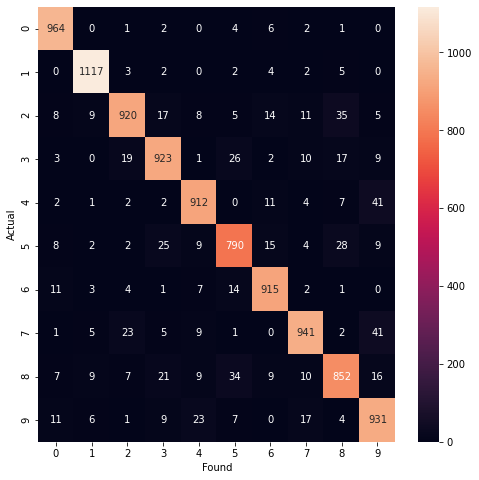

In [18]:
import seaborn as sn
plt.figure(figsize=(8,8))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Found')
plt.ylabel('Actual')

# Batch size=64,Number of  hidden layer(default),Learning rate(default)

In [18]:
 model=keras.Sequential([
        keras.layers.Dense(520,input_shape=(784,),activation='relu'),
        keras.layers.Dense(520,input_shape=(784,),activation='relu'),##adding two hidden later
        keras.layers.Dense(10,activation='sigmoid')##the nn is defined here.
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
history=model.fit(X_train_flattened,y_train,epochs=10,batch_size=64)## here the training is done and the trainig dataset is provided

Epoch 1/10
938/938 [==============================] - 8s 8ms/step - loss: 0.1921 - accuracy: 0.9416
Epoch 2/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0766 - accuracy: 0.9759
Epoch 3/10
938/938 [==============================] - 8s 8ms/step - loss: 0.0515 - accuracy: 0.9835
Epoch 4/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0393 - accuracy: 0.9872
Epoch 5/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0293 - accuracy: 0.9909
Epoch 6/10
938/938 [==============================] - 8s 8ms/step - loss: 0.0260 - accuracy: 0.9913
Epoch 7/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0219 - accuracy: 0.9929
Epoch 8/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0198 - accuracy: 0.9936
Epoch 9/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0130 - accuracy: 0.9957
Epoch 10/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0157 - accuracy: 0.9949

In [19]:
model.evaluate(X_test_flattened,y_test)## evaluating the accuracy of the test dataset

313/313 [==============================] - 1s 3ms/step - loss: 0.0909 - accuracy: 0.9800


[0.09090236574411392, 0.9800000190734863]

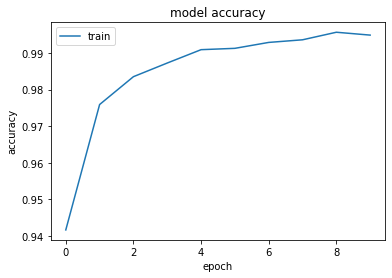

In [20]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

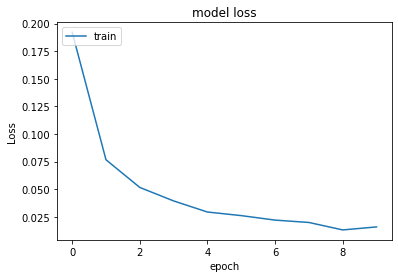

In [21]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
y_predict=model.predict(X_test_flattened)
y_predict## predicting the output values for all possible combination(0-9)

array([[4.4745844e-05, 4.1570008e-02, 7.3912740e-04, ..., 9.9999982e-01,
        2.2908151e-03, 9.2320585e-01],
       [2.1949708e-03, 2.0268622e-01, 1.0000000e+00, ..., 1.4233475e-05,
        1.3422993e-01, 4.3929466e-10],
       [1.3343991e-07, 9.9999940e-01, 1.4738739e-03, ..., 1.8444347e-01,
        6.4052373e-02, 4.0846513e-07],
       ...,
       [8.7038134e-11, 6.7159534e-04, 1.1323029e-09, ..., 2.6114881e-03,
        3.0624568e-03, 8.5093987e-01],
       [8.7032864e-10, 2.1708308e-08, 3.7513239e-12, ..., 4.7495888e-07,
        9.9999940e-01, 7.2550530e-09],
       [1.1854664e-06, 2.0254516e-09, 4.7115063e-06, ..., 8.8085563e-12,
        2.4431318e-02, 3.0843994e-06]], dtype=float32)

In [23]:
y_predict_labels=[np.argmax(i) for i in y_predict]##making class labels for all the elements .Here we finding the 
##max value for all the 'i' values 
y_predict_labels[:5]

[7, 2, 1, 0, 4]

In [24]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    1,    1,    0,    0,    2,    2,    1,    2,    0],
       [   0, 1125,    1,    3,    0,    0,    2,    1,    3,    0],
       [   3,    0, 1005,    4,    2,    0,    2,    5,   10,    1],
       [   0,    0,    3,  987,    0,    3,    0,    3,   10,    4],
       [   0,    0,    2,    0,  959,    0,    4,    2,    1,   14],
       [   1,    0,    0,   15,    1,  860,    9,    0,    5,    1],
       [   2,    2,    0,    0,    3,    1,  948,    0,    2,    0],
       [   1,    3,   10,    1,    2,    0,    0, 1004,    4,    3],
       [   2,    1,    2,    1,    0,    2,    1,    2,  960,    3],
       [   1,    2,    0,    4,    6,    2,    1,    8,    6,  979]])>

Text(33.0, 0.5, 'Actual')

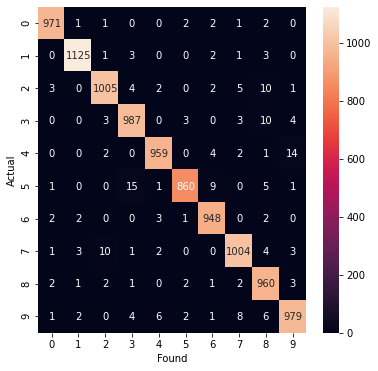

In [25]:
import seaborn as sn
plt.figure(figsize=(6,6))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Found')
plt.ylabel('Actual')

# Batch size=128,Number of  hidden layer(default),Learning rate(default)

In [26]:
 model=keras.Sequential([
        keras.layers.Dense(520,input_shape=(784,),activation='relu'),
        keras.layers.Dense(520,input_shape=(784,),activation='relu'),##adding two hidden later
        keras.layers.Dense(10,activation='sigmoid')##the nn is defined here.
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
history=model.fit(X_train_flattened,y_train,epochs=20,batch_size=128)## here the training is done and the trainig dataset is provided

Epoch 1/20
469/469 [==============================] - 5s 10ms/step - loss: 0.2130 - accuracy: 0.9376
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0780 - accuracy: 0.9758
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0503 - accuracy: 0.9842
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0348 - accuracy: 0.9883
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0252 - accuracy: 0.9916
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0219 - accuracy: 0.9928
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0164 - accuracy: 0.9945
Epoch 8/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0195 - accuracy: 0.9934
Epoch 9/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0145 - accuracy: 0.9952
Epoch 10/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0137 - accuracy: 0.

In [27]:
model.evaluate(X_test_flattened,y_test)## evaluating the accuracy of the test dataset

313/313 [==============================] - 1s 3ms/step - loss: 0.1006 - accuracy: 0.9820


[0.10058798640966415, 0.9819999933242798]

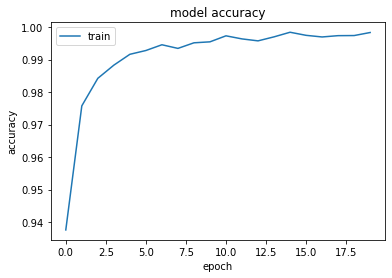

In [28]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

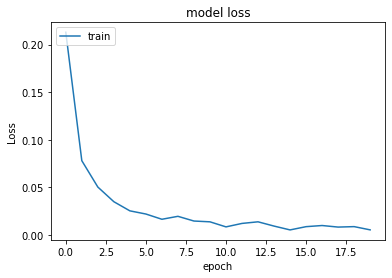

In [29]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
y_predict=model.predict(X_test_flattened)
y_predict## predicting the output values for all possible combination(0-9)

array([[3.5091978e-09, 7.6570380e-01, 2.3676891e-06, ..., 1.0000000e+00,
        1.9171928e-05, 5.9619290e-01],
       [1.2759602e-01, 9.9614835e-01, 1.0000000e+00, ..., 2.4789572e-04,
        2.0922750e-02, 1.5249358e-13],
       [9.5160067e-06, 1.0000000e+00, 1.7064573e-05, ..., 5.8351773e-01,
        4.7869441e-01, 7.2351686e-05],
       ...,
       [9.5085806e-09, 1.7947435e-02, 2.6333397e-10, ..., 2.0024449e-02,
        2.1137208e-02, 2.6516050e-02],
       [4.6927301e-08, 1.0136316e-09, 6.0722036e-09, ..., 1.0444812e-05,
        9.9871898e-01, 4.6939633e-07],
       [2.5291854e-06, 3.3420364e-09, 2.2287203e-08, ..., 8.7398209e-13,
        4.5029223e-03, 4.1860307e-08]], dtype=float32)

In [31]:
y_predict_labels=[np.argmax(i) for i in y_predict]##making class labels for all the elements .Here we finding the 
##max value for all the 'i' values 
y_predict_labels[:5]

[7, 2, 1, 0, 4]

In [32]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    2,    0,    1,    1,    0,    1,    2,    1,    1],
       [   0, 1125,    2,    2,    0,    1,    2,    1,    2,    0],
       [   2,    0, 1007,    1,    4,    0,    2,    9,    6,    1],
       [   2,    0,    4,  992,    0,    2,    0,    5,    4,    1],
       [   2,    1,    2,    0,  958,    0,    5,    0,    1,   13],
       [   2,    0,    0,   22,    1,  858,    4,    1,    2,    2],
       [   3,    2,    0,    0,    6,    3,  943,    0,    1,    0],
       [   0,    0,    3,    1,    0,    0,    0, 1015,    3,    6],
       [   2,    0,    1,    2,    2,    0,    2,    3,  958,    4],
       [   1,    3,    0,    5,    9,    0,    0,    7,    1,  983]])>

Text(33.0, 0.5, 'Actual')

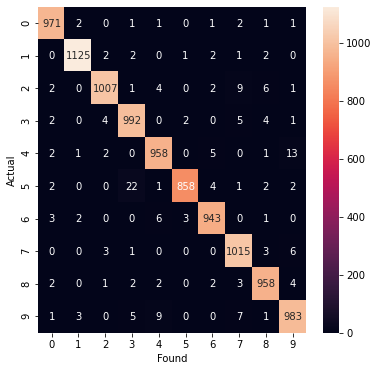

In [33]:
import seaborn as sn
plt.figure(figsize=(6,6))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Found')
plt.ylabel('Actual')

#  Batch size(default),Number of  hidden layer=1,Learning rate(default)

In [34]:
  model=keras.Sequential([
        keras.layers.Dense(520,input_shape=(784,),activation='relu'),##adding one hidden later
        keras.layers.Dense(10,activation='sigmoid')##the nn is defined here.
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
history=model.fit(X_train_flattened,y_train,epochs=20)## here the training is done and the trainig dataset is provided

Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2007 - accuracy: 0.9408
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0800 - accuracy: 0.9757
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0519 - accuracy: 0.9837
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0377 - accuracy: 0.9880
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0275 - accuracy: 0.9912
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0204 - accuracy: 0.9929
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0174 - accuracy: 0.9940
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0136 - accuracy: 0.9956
Epoch 9/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0121 - accuracy: 0.9960
Epoch 10/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.010

In [35]:
model.evaluate(X_test_flattened,y_test)## evaluating the accuracy of the test dataset

313/313 [==============================] - 1s 2ms/step - loss: 0.1065 - accuracy: 0.9817


[0.1064717173576355, 0.9817000031471252]

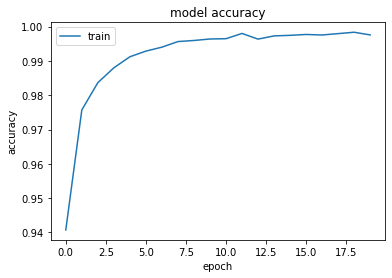

In [36]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

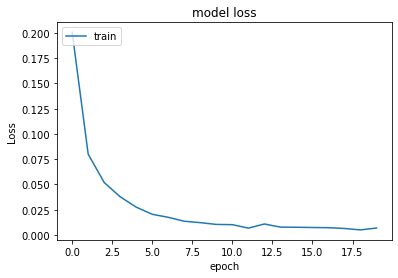

In [37]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
y_predict=model.predict(X_test_flattened)
y_predict## predicting the output values for all possible combination(0-9)

array([[1.7195095e-09, 1.8513657e-10, 2.5132299e-06, ..., 1.0000000e+00,
        7.1633934e-09, 1.6683871e-05],
       [1.9098655e-13, 2.3260713e-04, 1.0000000e+00, ..., 1.2006821e-19,
        4.9231336e-10, 2.7647648e-24],
       [2.0329249e-13, 9.9998796e-01, 4.3460727e-04, ..., 1.7281175e-03,
        8.3508790e-03, 3.2603074e-12],
       ...,
       [1.2923071e-20, 2.5203893e-12, 5.9009787e-18, ..., 1.3953447e-04,
        2.7663797e-02, 4.3158829e-03],
       [1.5788717e-12, 1.5972809e-13, 7.0965585e-15, ..., 2.1814085e-10,
        9.9973059e-01, 1.9318433e-10],
       [5.9808571e-09, 6.5912127e-17, 7.9188780e-05, ..., 6.3393158e-12,
        1.4498190e-08, 2.5279346e-11]], dtype=float32)

In [39]:
y_predict_labels=[np.argmax(i) for i in y_predict]##making class labels for all the elements .Here we finding the 
##max value for all the 'i' values 
y_predict_labels[:5]

[7, 2, 1, 0, 4]

In [40]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    0,    1,    1,    1,    1,    1,    1,    1,    1],
       [   0, 1123,    3,    1,    0,    0,    2,    1,    5,    0],
       [   2,    1, 1009,    5,    1,    0,    0,    6,    8,    0],
       [   0,    0,    3,  993,    0,    4,    0,    3,    4,    3],
       [   1,    0,    4,    0,  955,    0,    3,    2,    2,   15],
       [   2,    0,    0,    6,    1,  874,    1,    2,    4,    2],
       [   1,    2,    1,    1,    3,    8,  937,    1,    4,    0],
       [   0,    2,    6,    1,    1,    0,    0, 1009,    3,    6],
       [   0,    0,    4,    2,    2,    1,    0,    4,  958,    3],
       [   1,    2,    0,    2,    6,    0,    0,    5,    6,  987]])>

Text(51.0, 0.5, 'Actual')

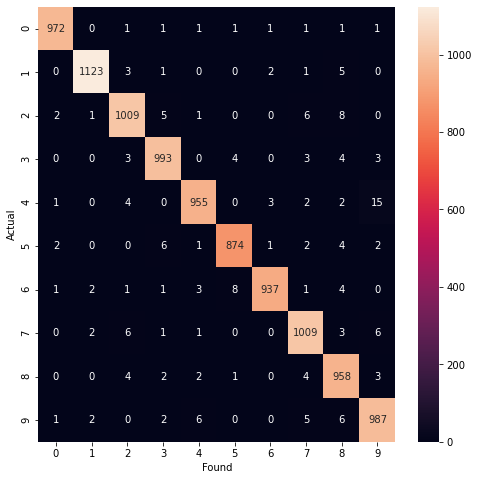

In [41]:
import seaborn as sn
plt.figure(figsize=(8,8))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Found')
plt.ylabel('Actual')

# Batch size(default),Number of hidden layer=2,Learning rate(default)

In [42]:
  model=keras.Sequential([
         keras.layers.Dense(520,input_shape=(784,),activation='relu'),
        keras.layers.Dense(520,input_shape=(784,),activation='relu'),##adding one hidden later
        keras.layers.Dense(10,activation='sigmoid')##the nn is defined here.
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
history=model.fit(X_train_flattened,y_train,epochs=20)## here the training is done and the trainig dataset is provided

Epoch 1/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1829 - accuracy: 0.9445
Epoch 2/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0818 - accuracy: 0.9751
Epoch 3/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0565 - accuracy: 0.9824
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0419 - accuracy: 0.9869
Epoch 5/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0331 - accuracy: 0.9892
Epoch 6/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0290 - accuracy: 0.9908
Epoch 7/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0260 - accuracy: 0.9920
Epoch 8/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0223 - accuracy: 0.9929
Epoch 9/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0177 - accuracy: 0.9941
Epoch 10/20
1875/1875 [==============================] - 13s 7ms/step - l

In [43]:
model.evaluate(X_test_flattened,y_test)## evaluating the accuracy of the test dataset

313/313 [==============================] - 1s 4ms/step - loss: 0.1540 - accuracy: 0.9795


[0.15401242673397064, 0.9794999957084656]

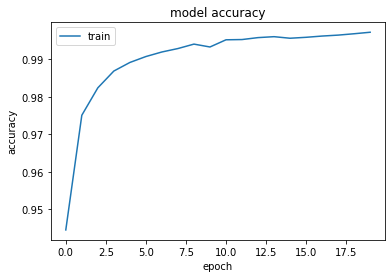

In [44]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

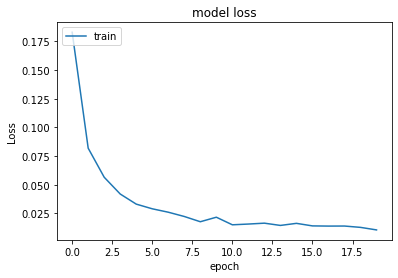

In [45]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [46]:
y_predict=model.predict(X_test_flattened)
y_predict## predicting the output values for all possible combination(0-9)

array([[2.7649406e-19, 6.8903653e-08, 3.5556389e-13, ..., 1.0000000e+00,
        1.1652932e-12, 7.3490828e-02],
       [4.4691105e-06, 6.8207359e-01, 1.0000000e+00, ..., 3.3741350e-11,
        2.8087317e-13, 1.1132170e-15],
       [3.1869958e-11, 1.0000000e+00, 2.7816040e-07, ..., 8.0795076e-07,
        1.3474537e-06, 4.5554465e-14],
       ...,
       [2.0838796e-20, 5.2849321e-15, 7.0186173e-23, ..., 1.1696841e-09,
        1.5957642e-17, 1.6791007e-07],
       [5.1760486e-17, 9.5254629e-35, 2.1544925e-30, ..., 5.0411928e-20,
        1.5578566e-09, 7.3762554e-19],
       [2.0619740e-14, 1.8955381e-24, 7.9252382e-24, ..., 4.1815568e-29,
        1.2992964e-09, 5.3676838e-16]], dtype=float32)

In [47]:
y_predict_labels=[np.argmax(i) for i in y_predict]##making class labels for all the elements .Here we finding the 
##max value for all the 'i' values 
y_predict_labels[:5]

[7, 2, 1, 0, 4]

In [48]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    1,    0,    0,    0,    1,    2,    2,    0,    1],
       [   0, 1124,    1,    1,    0,    1,    2,    2,    4,    0],
       [   4,    0, 1012,    3,    2,    0,    2,    5,    4,    0],
       [   0,    0,    5,  985,    0,    4,    0,    5,    3,    8],
       [   1,    0,    3,    0,  959,    1,    4,    1,    2,   11],
       [   2,    0,    0,    3,    2,  880,    3,    0,    2,    0],
       [   4,    2,    0,    0,    4,   10,  936,    0,    2,    0],
       [   2,    2,    8,    1,    3,    0,    0, 1002,    2,    8],
       [   7,    1,    2,    5,    1,    9,    0,    3,  942,    4],
       [   2,    2,    0,    2,    7,    6,    0,    1,    3,  986]])>

Text(51.0, 0.5, 'Actual')

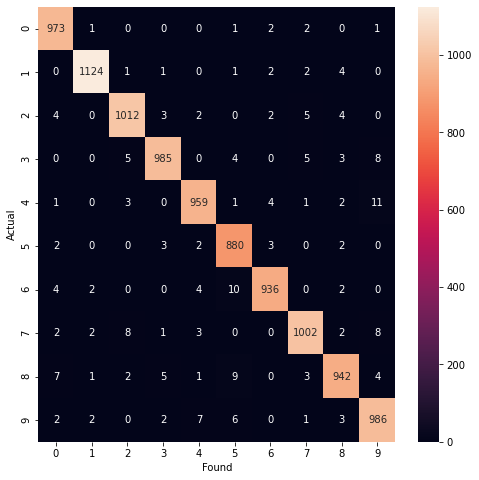

In [49]:
import seaborn as sn
plt.figure(figsize=(8,8))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Found')
plt.ylabel('Actual')

# Batch size(default),Number of hidden layer=4,Learning rate(default)

In [50]:
model=keras.Sequential([
          keras.layers.Dense(520,input_shape=(784,),activation='relu'),
         keras.layers.Dense(520,input_shape=(784,),activation='relu'),
         keras.layers.Dense(520,input_shape=(784,),activation='relu'),
        keras.layers.Dense(520,input_shape=(784,),activation='relu'),##adding one hidden later
        keras.layers.Dense(10,activation='sigmoid')##the nn is defined here.
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
history=model.fit(X_train_flattened,y_train,epochs=20)## here the training is done and the trainig dataset is provided

Epoch 1/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2140 - accuracy: 0.9363
Epoch 2/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1029 - accuracy: 0.9696
Epoch 3/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0790 - accuracy: 0.9775
Epoch 4/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0604 - accuracy: 0.9827
Epoch 5/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0522 - accuracy: 0.9847
Epoch 6/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0456 - accuracy: 0.9868
Epoch 7/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0406 - accuracy: 0.9887
Epoch 8/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0373 - accuracy: 0.9896
Epoch 9/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0324 - accuracy: 0.9909
Epoch 10/20
1875/1875 [==============================] - 26s 14m

In [51]:
model.evaluate(X_test_flattened,y_test)## evaluating the accuracy of the test dataset

313/313 [==============================] - 2s 7ms/step - loss: 0.1738 - accuracy: 0.9767


[0.17377473413944244, 0.9767000079154968]

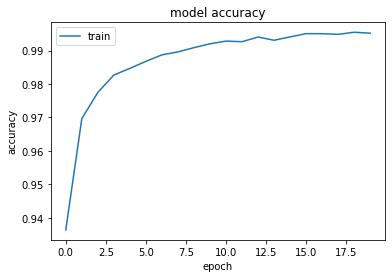

In [52]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

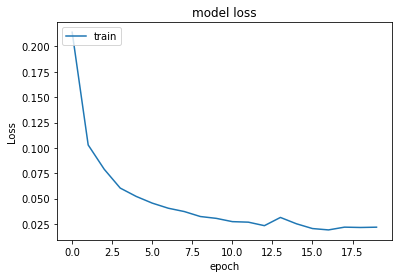

In [53]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [54]:
y_predict=model.predict(X_test_flattened)
y_predict## predicting the output values for all possible combination(0-9)

array([[0.0000000e+00, 1.6911919e-28, 5.1048696e-24, ..., 9.9997348e-01,
        0.0000000e+00, 1.5009858e-19],
       [2.3704887e-19, 2.8614733e-18, 9.0252888e-01, ..., 6.3406052e-21,
        6.0940584e-18, 1.0406130e-23],
       [0.0000000e+00, 2.2535216e-06, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [6.1221777e-27, 4.3675757e-24, 6.3303560e-29, ..., 6.1601791e-26,
        1.0198977e-31, 1.0283145e-20],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        3.7651889e-30, 0.0000000e+00],
       [1.4119525e-17, 1.5257070e-24, 5.0138647e-27, ..., 6.6233790e-38,
        6.6624304e-15, 4.5380488e-37]], dtype=float32)

In [55]:
y_predict_labels=[np.argmax(i) for i in y_predict]##making class labels for all the elements .Here we finding the 
##max value for all the 'i' values 
y_predict_labels[:5]

[7, 2, 1, 0, 4]

In [56]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 974,    0,    0,    0,    0,    0,    2,    1,    3,    0],
       [   0, 1089,    1,    2,    0,    1,    1,    1,   40,    0],
       [   6,    0, 1007,    2,    2,    0,    0,    6,    9,    0],
       [   1,    1,    3,  977,    0,    7,    0,    3,    9,    9],
       [   1,    0,    1,    0,  964,    0,    3,    0,    1,   12],
       [   2,    0,    0,    4,    0,  866,    6,    1,   10,    3],
       [   4,    2,    0,    0,    5,    1,  941,    0,    5,    0],
       [   3,    3,    9,    1,    1,    0,    0,  998,    3,   10],
       [   1,    0,    2,    1,    1,    2,    1,    2,  959,    5],
       [   1,    2,    0,    0,    6,    3,    0,    2,    3,  992]])>

Text(33.0, 0.5, 'Actual')

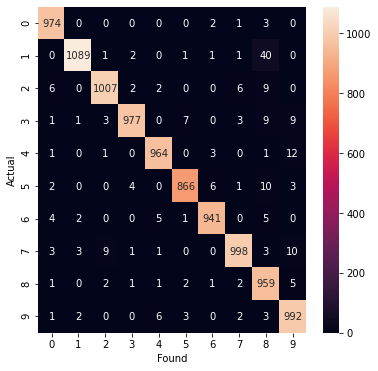

In [57]:
import seaborn as sn
plt.figure(figsize=(6,6))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Found')
plt.ylabel('Actual')

# Batch size(default),Number of hidden layer=6,Learning rate(default)¶

In [58]:
model=keras.Sequential([
         keras.layers.Dense(520,input_shape=(784,),activation='relu'),
         keras.layers.Dense(520,input_shape=(784,),activation='relu'),
         keras.layers.Dense(520,input_shape=(784,),activation='relu'),
         keras.layers.Dense(520,input_shape=(784,),activation='relu'),
         keras.layers.Dense(520,input_shape=(784,),activation='relu'),
         keras.layers.Dense(520,input_shape=(784,),activation='relu'),##adding one hidden later
         keras.layers.Dense(10,activation='sigmoid')##the nn is defined here.
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
history=model.fit(X_train_flattened,y_train,epochs=20)## here the training is done and the trainig dataset is provided

Epoch 1/20
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2589 - accuracy: 0.9278
Epoch 2/20
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1299 - accuracy: 0.9652
Epoch 3/20
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0970 - accuracy: 0.9746
Epoch 4/20
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0825 - accuracy: 0.9792
Epoch 5/20
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0680 - accuracy: 0.9824
Epoch 6/20
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0597 - accuracy: 0.9847
Epoch 7/20
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0510 - accuracy: 0.98680s - loss: 0
Epoch 8/20
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0465 - accuracy: 0.9883
Epoch 9/20
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0402 - accuracy: 0.9896
Epoch 10/20
1875/1875 [=============================

In [59]:
model.evaluate(X_test_flattened,y_test)## evaluating the accuracy of the test dataset

313/313 [==============================] - 3s 7ms/step - loss: 0.2352 - accuracy: 0.9719


[0.23521548509597778, 0.9718999862670898]

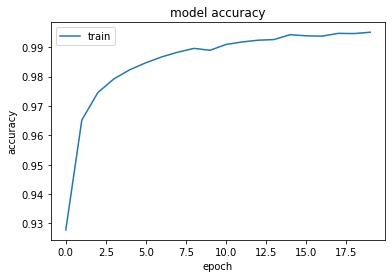

In [60]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

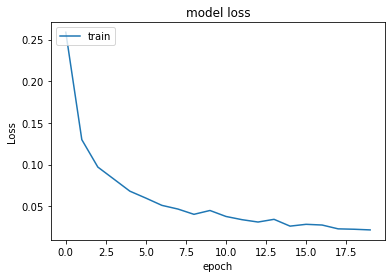

In [61]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [62]:
y_predict=model.predict(X_test_flattened)
y_predict## predicting the output values for all possible combination(0-9)

array([[0.0000000e+00, 1.3620628e-33, 2.6522272e-36, ..., 1.0000000e+00,
        0.0000000e+00, 7.0764358e-18],
       [0.0000000e+00, 0.0000000e+00, 4.9918948e-21, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 2.6232625e-05, 0.0000000e+00, ..., 0.0000000e+00,
        7.6187508e-31, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 3.0307617e-38, ..., 0.0000000e+00,
        0.0000000e+00, 5.5351999e-16],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.2480696e-33, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [63]:
y_predict_labels=[np.argmax(i) for i in y_predict]##making class labels for all the elements .Here we finding the 
##max value for all the 'i' values 
y_predict_labels[:5]

[7, 2, 1, 0, 4]

In [64]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    0,    0,    1,    0,    1,    2,    1,    3,    1],
       [   0, 1128,    0,    1,    0,    0,    1,    0,    5,    0],
       [  12,   10,  984,    3,    1,    0,    1,    7,   14,    0],
       [   1,    0,    3,  903,    0,   93,    0,    5,    3,    2],
       [   0,    0,    0,    0,  960,    0,   11,    0,    1,   10],
       [   2,    0,    0,    0,    0,  885,    1,    0,    2,    2],
       [   4,    3,    0,    0,    2,    8,  940,    0,    1,    0],
       [   2,    7,    3,    1,    1,    0,    0, 1001,    3,   10],
       [   4,    1,    0,    1,    0,   12,    1,    4,  949,    2],
       [   3,    2,    0,    1,    2,    4,    0,    3,    2,  992]])>

Text(33.0, 0.5, 'Actual')

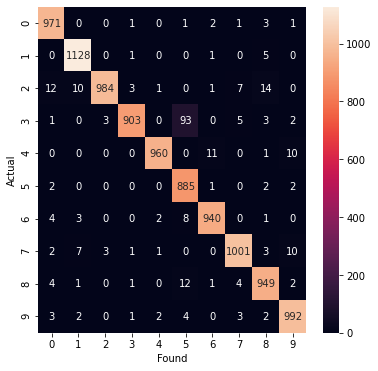

In [65]:
import seaborn as sn
plt.figure(figsize=(6,6))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Found')
plt.ylabel('Actual')

# Batch size(default),Number of hidden layer=8,Learning rate(default)

In [66]:
model=keras.Sequential([
          keras.layers.Dense(520,input_shape=(784,),activation='relu'),
          keras.layers.Dense(520,input_shape=(784,),activation='relu'),
         keras.layers.Dense(520,input_shape=(784,),activation='relu'),
         keras.layers.Dense(520,input_shape=(784,),activation='relu'),
         keras.layers.Dense(520,input_shape=(784,),activation='relu'),
         keras.layers.Dense(520,input_shape=(784,),activation='relu'),
         keras.layers.Dense(520,input_shape=(784,),activation='relu'),
         keras.layers.Dense(520,input_shape=(784,),activation='relu'),##adding one hidden later
         keras.layers.Dense(10,activation='sigmoid')##the nn is defined here.
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
history=model.fit(X_train_flattened,y_train,epochs=20)## here the training is done and the trainig dataset is provided

Epoch 1/20
1875/1875 [==============================] - 46s 24ms/step - loss: 0.3068 - accuracy: 0.9168
Epoch 2/20
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1609 - accuracy: 0.9620
Epoch 3/20
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1165 - accuracy: 0.9714
Epoch 4/20
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1065 - accuracy: 0.9748
Epoch 5/20
1875/1875 [==============================] - 50s 26ms/step - loss: 0.0944 - accuracy: 0.97880s - los
Epoch 6/20
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0795 - accuracy: 0.9824
Epoch 7/20
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0756 - accuracy: 0.9826
Epoch 8/20
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0650 - accuracy: 0.9849
Epoch 9/20
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0601 - accuracy: 0.9861
Epoch 10/20
1875/1875 [==============================] -

In [75]:
model.evaluate(X_test_flattened,y_test)## evaluating the accuracy of the test dataset

313/313 [==============================] - 1s 4ms/step - loss: 0.0950 - accuracy: 0.9776: 0s - loss: 0.0930 - accuracy: 


[0.09500346332788467, 0.9775999784469604]

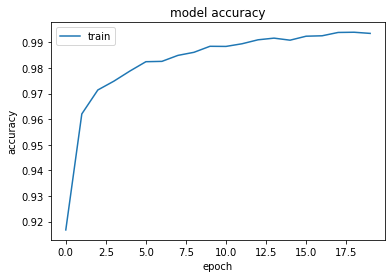

In [76]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

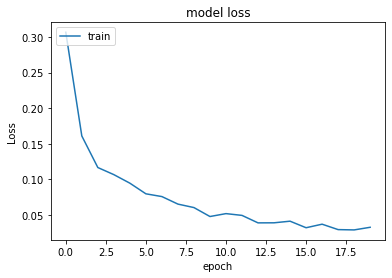

In [77]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [78]:
y_predict=model.predict(X_test_flattened)
y_predict## predicting the output values for all possible combination(0-9)

array([[1.8868148e-03, 1.6261518e-02, 3.9318204e-03, ..., 9.9999952e-01,
        4.5898557e-04, 4.5927572e-01],
       [4.4962675e-05, 6.8018973e-01, 1.0000000e+00, ..., 1.7261386e-02,
        7.6135993e-04, 4.6121596e-11],
       [2.9232000e-05, 9.9999297e-01, 4.2258799e-03, ..., 6.1029041e-01,
        4.2746919e-01, 8.9622017e-06],
       ...,
       [8.7709409e-11, 1.6996264e-04, 4.3572541e-07, ..., 7.9810168e-05,
        1.7256379e-02, 2.1255013e-05],
       [7.1493382e-08, 4.5296240e-08, 7.2298292e-09, ..., 6.6368193e-05,
        8.0667233e-01, 6.8212023e-05],
       [9.9462271e-04, 2.4100743e-06, 1.6230383e-09, ..., 1.9066942e-14,
        1.9678593e-02, 2.3167345e-07]], dtype=float32)

In [79]:
y_predict_labels=[np.argmax(i) for i in y_predict]##making class labels for all the elements .Here we finding the 
##max value for all the 'i' values 
y_predict_labels[:5]

[7, 2, 1, 0, 4]

In [80]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    1,    2,    0,    0,    1,    9,    1,    1,    0],
       [   0, 1117,    1,    1,    0,    3,    3,    2,    8,    0],
       [   7,    1,  999,    7,    1,    1,    3,    5,    8,    0],
       [   0,    0,    1,  995,    0,    7,    0,    4,    2,    1],
       [   0,    0,    5,    0,  958,    0,    8,    2,    0,    9],
       [   2,    0,    0,    4,    2,  880,    2,    2,    0,    0],
       [   2,    3,    0,    1,    1,    8,  942,    0,    1,    0],
       [   1,    2,    5,    1,    0,    0,    0, 1015,    1,    3],
       [   2,    0,    4,   11,    3,   11,    4,    4,  930,    5],
       [   2,    2,    0,    2,   18,    3,    1,    6,    2,  973]])>

Text(33.0, 0.5, 'Actual')

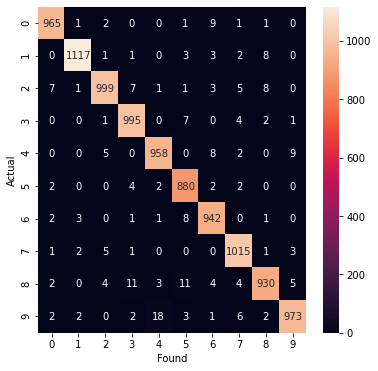

In [81]:
import seaborn as sn
plt.figure(figsize=(6,6))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Found')
plt.ylabel('Actual')

# Batch size(default),Number of hidden layer(default),Learning rate=0.01

In [104]:
model=keras.Sequential([          
         keras.layers.Dense(520,input_shape=(784,),activation='relu'),
         keras.layers.Dense(520,input_shape=(784,),activation='relu'),##adding one hidden later
         keras.layers.Dense(10,activation='sigmoid')##the nn is defined here.
])
myoptimizer=keras.optimizers.Adam(learning_rate=0.01)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
history=model.fit(X_train_flattened,y_train,epochs=5)## here the training is done and the trainig dataset is provided

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1828 - accuracy: 0.9439
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0794 - accuracy: 0.9747
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0550 - accuracy: 0.9830
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0432 - accuracy: 0.9859
Epoch 5/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0331 - accuracy: 0.9894


In [105]:
model.evaluate(X_test_flattened,y_test)## evaluating the accuracy of the test dataset

313/313 [==============================] - 1s 4ms/step - loss: 0.0739 - accuracy: 0.9801


[0.07390246540307999, 0.9800999760627747]

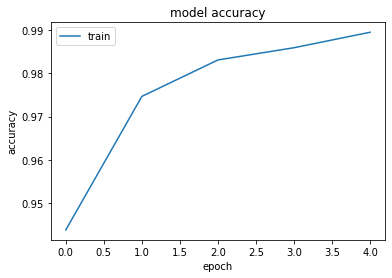

In [106]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

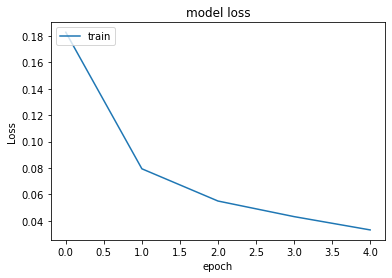

In [107]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [108]:
y_predict=model.predict(X_test_flattened)
y_predict## predicting the output values for all possible combination(0-9)

array([[6.30678755e-07, 3.84212911e-01, 9.72199440e-03, ...,
        9.99994755e-01, 2.98961997e-03, 5.12268543e-01],
       [4.44410471e-05, 2.72067964e-01, 1.00000000e+00, ...,
        1.94606801e-05, 5.54621220e-04, 1.33198133e-10],
       [1.72793865e-04, 9.99985635e-01, 4.84532118e-03, ...,
        9.50383842e-02, 1.62651032e-01, 2.78538465e-03],
       ...,
       [2.68657629e-08, 2.38684416e-02, 1.02716385e-05, ...,
        9.10243392e-03, 8.87893693e-05, 5.64071178e-01],
       [1.66272207e-06, 1.51550736e-08, 1.48692789e-06, ...,
        2.71415629e-05, 9.96668577e-01, 1.49184465e-03],
       [1.98155642e-04, 2.47706248e-05, 1.25901209e-08, ...,
        2.57498911e-10, 9.64523554e-02, 3.30823660e-03]], dtype=float32)

In [109]:
y_predict_labels=[np.argmax(i) for i in y_predict]##making class labels for all the elements .Here we finding the 
##max value for all the 'i' values 
y_predict_labels[:5]

[7, 2, 1, 0, 4]

In [110]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    2,    1,    1,    1,    4,    0,    3,    0],
       [   0, 1127,    0,    5,    0,    0,    0,    0,    3,    0],
       [   2,    1, 1006,    7,    3,    2,    1,    5,    5,    0],
       [   0,    0,    1,  990,    0,    8,    0,    0,    9,    2],
       [   0,    0,    2,    0,  964,    0,    4,    4,    0,    8],
       [   1,    0,    0,    4,    0,  877,    4,    0,    2,    4],
       [   9,    3,    0,    1,    5,    4,  933,    0,    3,    0],
       [   0,    6,    3,    3,    0,    0,    0, 1010,    2,    4],
       [   0,    2,    1,    4,    1,    8,    2,    1,  949,    6],
       [   2,    2,    0,    5,   11,    4,    0,    6,    1,  978]])>

Text(33.0, 0.5, 'Actual')

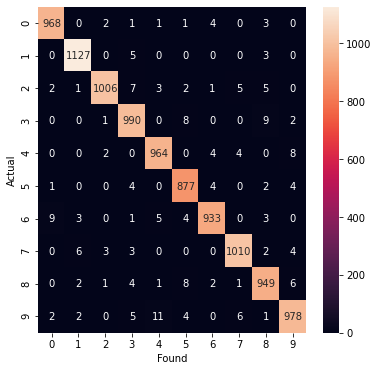

In [111]:
import seaborn as sn
plt.figure(figsize=(6,6))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Found')
plt.ylabel('Actual')

# Batch size(default),Number of hidden layer(default),Learning rate=0.05

In [112]:
model=keras.Sequential([          
         keras.layers.Dense(520,input_shape=(784,),activation='relu'),
         keras.layers.Dense(520,input_shape=(784,),activation='relu'),##adding one hidden later
         keras.layers.Dense(10,activation='sigmoid')##the nn is defined here.
])
myoptimizer=keras.optimizers.Adam(learning_rate=0.05)
model.compile(
    optimizer=myoptimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
history=model.fit(X_train_flattened,y_train,epochs=5)## here the training is done and the trainig dataset is provided

Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 1.0862 - accuracy: 0.7435
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.8284 - accuracy: 0.7395
Epoch 3/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.9771 - accuracy: 0.6660
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 1.1950 - accuracy: 0.5583
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 1.2603 - accuracy: 0.4806


In [115]:
model.evaluate(X_test_flattened,y_test)## evaluating the accuracy of the test dataset

313/313 [==============================] - 1s 4ms/step - loss: 1.2062 - accuracy: 0.4767


[1.2061553001403809, 0.4767000079154968]

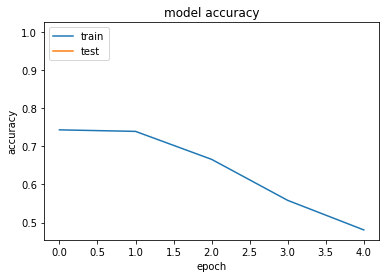

In [116]:
plt.plot(history.history['accuracy'])

plt.plot(1)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

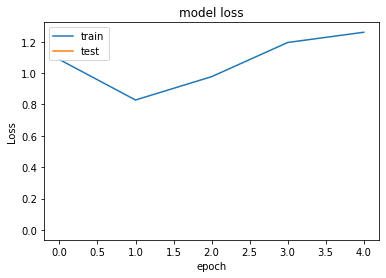

In [117]:
plt.plot(history.history['loss'])
plt.plot(0)
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [118]:
y_predict=model.predict(X_test_flattened)
y_predict## predicting the output values for all possible combination(0-9)

array([[1.5525818e-02, 5.4048359e-02, 1.8906024e-01, ..., 8.9136672e-01,
        2.2979414e-01, 8.7923932e-01],
       [1.0000000e+00, 9.9995530e-01, 1.0000000e+00, ..., 1.8480986e-01,
        1.0000000e+00, 5.3956747e-02],
       [1.7901980e-20, 1.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 9.9985588e-01],
       ...,
       [1.5525818e-02, 5.4048359e-02, 1.8906024e-01, ..., 8.9136672e-01,
        2.2979414e-01, 8.7923932e-01],
       [8.6698377e-01, 4.0201786e-01, 6.8756193e-01, ..., 1.6894665e-01,
        8.7773943e-01, 2.4441141e-01],
       [9.6201897e-01, 1.0000000e+00, 1.0000000e+00, ..., 1.5077244e-17,
        2.4751401e-09, 1.4120169e-10]], dtype=float32)

In [119]:
y_predict_labels=[np.argmax(i) for i in y_predict]##making class labels for all the elements .Here we finding the 
##max value for all the 'i' values 
y_predict_labels[:5]

[7, 0, 1, 8, 7]

In [120]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[   0,    0,    0,    0,    0,    0,    0,    1,  979,    0],
       [   0, 1075,    0,    0,    0,    0,    0,   10,   50,    0],
       [ 410,    1,   96,    1,    4,    7,    0,   83,  430,    0],
       [   0,  657,   14,  156,    3,    0,    0,   24,  156,    0],
       [   0,    1,    0,    0,    5,    0,    0,  929,   47,    0],
       [   0,    1,    1,   21,    6,    0,    0,   15,  848,    0],
       [   0,  381,    0,    0,    0,    2,   55,    6,  514,    0],
       [   0,    3,    0,    0,    1,    0,    0,  990,   34,    0],
       [   0,    2,    0,    2,    6,    0,    0,   36,  928,    0],
       [   0,    4,    0,    3,    2,    0,    0,  954,   46,    0]])>

Text(33.0, 0.5, 'Actual')

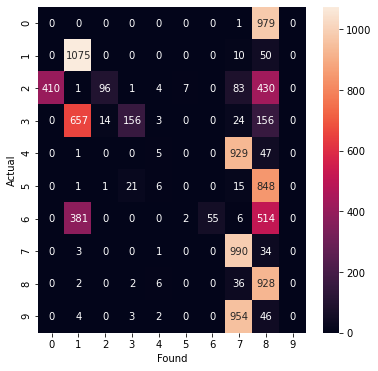

In [121]:
import seaborn as sn
plt.figure(figsize=(6,6))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Found')
plt.ylabel('Actual')